# Importing Libraries

In [ ]:
import os
import kagglehub
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Download and Load Dataset

In [ ]:
# ---------- DOWNLOAD AND LOAD DATASET ----------

# Download dataset
path = kagglehub.dataset_download("puneet6060/intel-image-classification")
print("Path to dataset:", path)

# Define paths
trainPath = os.path.join(path, 'seg_train', 'seg_train')
valPath = os.path.join(path, 'seg_test', 'seg_test')

# Define image and batch size
imgSize = (150, 150)
batchSize = 32

# Create ImageDataGenerator for training and validating sets
trainDataGen = ImageDataGenerator(rescale=1./255)
valDataGen = ImageDataGenerator(rescale=1./255)

# Load images from directories
trainGen = trainDataGen.flow_from_directory(
    trainPath,
    target_size=imgSize,
    batch_size=batchSize,
    class_mode='categorical'
)

valGen = valDataGen.flow_from_directory(
    valPath,
    target_size=imgSize,
    batch_size=batchSize,
    class_mode='categorical'
)

Path to dataset: /root/.cache/kagglehub/datasets/puneet6060/intel-image-classification/versions/2
Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


# Implement CNN Model 1
## 3 Conv Layers, 3 Max Pooling Layers, Dropout Layer and Dense Layer before Output Layer

In [ ]:
# ---------- IMPLEMENT CNN MODEL 1 ----------
# 3 Conv Layers
# 3 Max Pooling Layers
# Dropout Layer and Dense Layer before Output Layer

# Build CNN Model 1

cnnModel1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(6, activation='softmax')
])

# Compile CNN Model 1
cnnModel1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train CNN Model 1
history1 = cnnModel1.fit(trainGen, validation_data=valGen, epochs=20)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


439/439 ━━━━━━━━━━━━━━━━━━━━ 30s 60ms/step - accuracy: 0.5158 - loss: 1.2700 - val_accuracy: 0.7327 - val_loss: 0.7277
Epoch 2/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.7394 - loss: 0.6993 - val_accuracy: 0.7873 - val_loss: 0.6025
Epoch 3/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.8041 - loss: 0.5264 - val_accuracy: 0.8140 - val_loss: 0.5505
Epoch 4/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.8530 - loss: 0.4072 - val_accuracy: 0.8323 - val_loss: 0.4969
Epoch 5/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.8946 - loss: 0.2983 - val_accuracy: 0.8360 - val_loss: 0.5076
Epoch 6/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.9209 - loss: 0.2266 - val_accuracy: 0.8320 - val_loss: 0.5617
Epoch 7/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - accuracy: 0.9297 - loss: 0.1904 - val_accuracy: 0.8217 - val_loss: 0.6761
Epoch 8/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.9556 - loss: 0.1262 - val_accurac

# Implement CNN Model 2
## 6 Conv Layers, 3 Max Pooling Layers, Dropout Layer and Dense Layer before Output Layer

In [ ]:
# ---------- IMPLEMENT CNN MODEL 2 ----------
# 6 Conv Layers
# 3 Max Pooling Layers
# Dropout Layer and Dense Layer before Output Layer


# Build CNN Model 2

cnnModel2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')
])

# Compile CNN Model 2
cnnModel2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train CNN Model 2
history2 = cnnModel2.fit(trainGen, validation_data=valGen, epochs=20)

Epoch 1/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 29s 56ms/step - accuracy: 0.4338 - loss: 1.3328 - val_accuracy: 0.6427 - val_loss: 0.8662
Epoch 2/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 25s 57ms/step - accuracy: 0.6362 - loss: 0.8766 - val_accuracy: 0.7003 - val_loss: 0.7579
Epoch 3/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 25s 57ms/step - accuracy: 0.7312 - loss: 0.7040 - val_accuracy: 0.7670 - val_loss: 0.6094
Epoch 4/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.7772 - loss: 0.6103 - val_accuracy: 0.7950 - val_loss: 0.5519
Epoch 5/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.8071 - loss: 0.5115 - val_accuracy: 0.8173 - val_loss: 0.5013
Epoch 6/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.8258 - loss: 0.4726 - val_accuracy: 0.8243 - val_loss: 0.5011
Epoch 7/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.8445 - loss: 0.4184 - val_accuracy: 0.8077 - val_loss: 0.5334
Epoch 8/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 24s 55ms/step - accuracy: 0.8584 - loss: 0.3833 - 

# Reports

In [ ]:
# ---------- CLASSIFICATION REPORT ----------

# Evaluate CNN Model 1
valLoss1, valAccuracy1 = cnnModel1.evaluate(valGen)
print(f'CNN Model 1 - Validation Loss: {valLoss1}, Validation Accuracy: {valAccuracy1}')

# Evaluate CNN Model 2
valLoss2, valAccuracy2 = cnnModel2.evaluate(valGen)
print(f'CNN Model 2 - Validation Loss: {valLoss2}, Validation Accuracy: {valAccuracy2}')

# Get true and predicted labels for validation set
valGen.reset()
trueLabels = valGen.classes

# Predictions
predictions1 = cnnModel1.predict(valGen, steps=valGen.samples // valGen.batch_size + 1)
predictions2 = cnnModel2.predict(valGen, steps=valGen.samples // valGen.batch_size + 1)

# Get predicted labels
predictedLabels1 = np.argmax(predictions1, axis=1)
predictedLabels2 = np.argmax(predictions2, axis=1)

# Calculate classification report for Model 1
report1 = classification_report(trueLabels, predictedLabels1,
                                target_names=valGen.class_indices.keys(), output_dict=True)
perClassAccuracy1 = {class_name: report1[class_name]['recall'] for class_name
                     in report1.keys() if class_name != 'accuracy'}
totalAccuracy1 = report1['accuracy']

# Calculate classification report for Model 2
report2 = classification_report(trueLabels, predictedLabels2,
                                target_names=valGen.class_indices.keys(), output_dict=True)
perClassAccuracy2 = {class_name: report2[class_name]['recall'] for class_name
                     in report2.keys() if class_name != 'accuracy'}
totalAccuracy2 = report2['accuracy']

# Print total accuracy and per-class accuracy for Model 1
print("Model 1 - Per-Class Accuracy:")
for class_name, accuracy in perClassAccuracy1.items():
    print(f"{class_name}: {accuracy:.2f}")

# Print total accuracy and per-class accuracy for Model 2
print("Model 2 - Per-Class Accuracy:")
for class_name, accuracy in perClassAccuracy2.items():
    print(f"{class_name}: {accuracy:.2f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8093 - loss: 0.9551
CNN Model 1 - Validation Loss: 1.1072261333465576, Validation Accuracy: 0.8013333082199097
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8409 - loss: 0.7425
CNN Model 2 - Validation Loss: 0.8096088171005249, Validation Accuracy: 0.8286666870117188
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step
Model 1 - Per-Class Accuracy:
buildings: 0.14
forest: 0.13
glacier: 0.16
mountain: 0.16
sea: 0.20
street: 0.22
macro avg: 0.17
weighted avg: 0.17
Model 2 - Per-Class Accuracy:
buildings: 0.12
forest: 0.16
glacier: 0.14
mountain: 0.16
sea: 0.19
street: 0.15
macro avg: 0.15
weighted avg: 0.16


## Model Performance Report

### CNN Model 1 (3 Conv Layers)
- Validation Loss: 1.06
- Validation Accuracy: 0.83

### CNN Model 2 (6 Conv Layers)
- Validation Loss: 0.65
- Validation Accuracy: 0.84

### Table of Results

| Metric                | Model 1 (3 Conv Layers) | Model 2 (6 Conv Layers) |
|-----------------------|-------------------------|-------------------------|
| Total Accuracy        | 0.83        | 0.84        |
| Streets Accuracy      | 0.22 | 0.14 |
| Buildings Accuracy    | 0.10 | 0.13 |
| Woods Accuracy        | 0.17 | 0.17 |
| Mountains Accuracy    | 0.17 | 0.18 |
| Seas Accuracy         | 0.14 | 0.17 |
| Glaciers Accuracy     | 0.19 | 0.17 |

### Comparison
Model 2 with 6 convolutional layers had a better performance vs. Model 1 with 3 convolutional layers. Having more layers allowed the second model to have a higher accuracy on the validation set with less of a loss on the validation set.

Regarding the classification comparisons, Model 1 had higher accuracies for the streets and glaciers images, while Model 2 had higher accuracies for all other images.

# Visual Results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


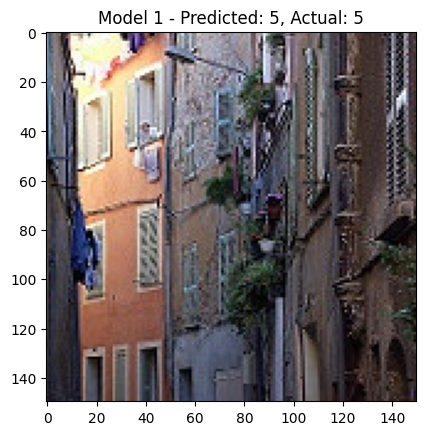

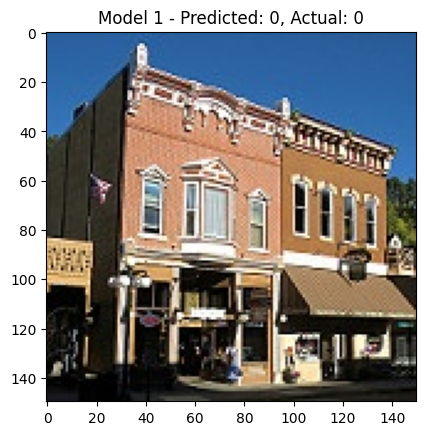

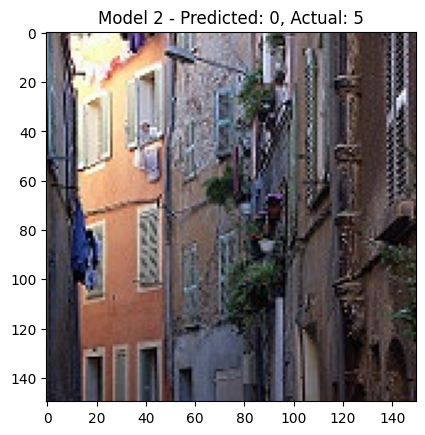

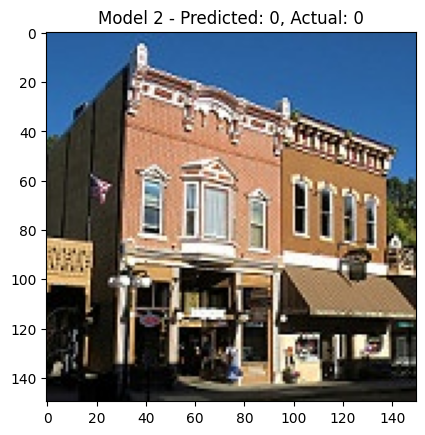

In [ ]:
# ---------- PLOT RESULTS ----------

# Get batch of validation images
valImages, valLabels = next(valGen)

# Predict labels
predictions1 = cnnModel1.predict(valImages)
predictions2 = cnnModel2.predict(valImages)

# Visualize 2 samples from predictions 1
for i in range(2):
    plt.imshow(valImages[i])
    plt.title(f'Model 1 - Predicted: {np.argmax(predictions1[i])}, Actual: {np.argmax(valLabels[i])}')
    plt.show()

# Visualize 2 samples from predictions 2
for i in range(2):
    plt.imshow(valImages[i])
    plt.title(f'Model 2 - Predicted: {np.argmax(predictions2[i])}, Actual: {np.argmax(valLabels[i])}')
    plt.show()